In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs
from astropy.visualization.wcsaxes import SphericalCircle
from scipy import constants as c

In [2]:
def generate_central_wcs(crval, cdelt):
    # Create a new WCS object.  The number of axes must be set
    # from the start
    w = wcs.WCS(naxis=2)

    # Set up an "Airy's zenithal" projection
    # Vector properties may be set with Python lists, or Numpy arrays
    #CTYPE1  = projection
    #CRVAL1  = central position in degrees
    #CDELT1  = pixel demarcation
    #CRPIX1  = reference pixel
    #CUNIT1  = values of angle objects
    w.wcs.crpix = np.array([0, 0]).astype(int)
    w.wcs.cdelt = np.array(cdelt).astype(float)
    w.wcs.crval = np.array(crval).astype(float)
    w.wcs.ctype = ["RA---SIN", "DEC--SIN"]

    # Some pixel coordinates of interest.
    pixcrd = np.array([[-10, -10], [24, 38], [45, 98]], np.float_)

    # Convert pixel coordinates to world coordinates
    world = w.wcs_pix2world(pixcrd, 1)
    print(world)

    # Convert the same coordinates back to pixel coordinates.
    pixcrd2 = w.wcs_world2pix(world, 1)
    print(pixcrd2)

    # These should be the same as the original pixel coordinates, modulo
    # some floating-point error.
    assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

    return w

In [4]:
df = ascii.read('ra_dec_catalog_S_band.txt')
coords = SkyCoord(df['RA'],df['DEC'],unit=('deg','deg'))
w = generate_central_wcs(crval=[150.1,2.55],cdelt=[1e-5,1e-5])

[[150.0998999    2.5499    ]
 [150.10024024   2.55038   ]
 [150.10045045   2.55098   ]]
[[-10. -10.]
 [ 24.  38.]
 [ 45.  98.]]


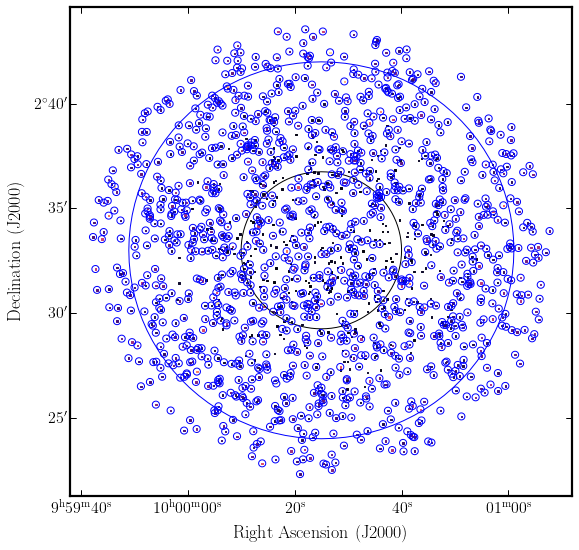

In [12]:
fig = plt.figure(1,figsize=(9,9))
ax = fig.add_subplot(111,projection=w)

### Plot S-band sources
im = ax.scatter(coords.ra.deg,coords.dec.deg,c=np.log10(df['PEAK_FLUX']),\
           transform=ax.get_transform('world'),s=2)

## Plot EVN primary beams
pointing_centre = SkyCoord('10:00:25.0','02:33:00.0',unit=('hour','deg'))
r = SphericalCircle((pointing_centre.ra.deg * u.deg, pointing_centre.dec.deg * u.deg), 0.15 * u.degree,
                     edgecolor='b', facecolor='none',
                     transform=ax.get_transform('fk5'))
ax.add_patch(r)
pointing_centre = SkyCoord('10:00:25.0','02:33:00.0',unit=('hour','deg'))
r = SphericalCircle((pointing_centre.ra.deg * u.deg, pointing_centre.dec.deg * u.deg), 7.5/2. * u.arcmin,
                     edgecolor='k', facecolor='none',
                     transform=ax.get_transform('fk5'))

ax.add_patch(r)

lim=5
for i in range(len(df[df['PEAK_FLUX']>lim])):
    c = SkyCoord(df[df['PEAK_FLUX']>lim]['RA'][i],df[df['PEAK_FLUX']>lim]['DEC'][i],unit=('deg','deg'))
    r = SphericalCircle((c.ra.deg * u.deg, c.dec.deg * u.deg), 10 * u.arcsec,
                     edgecolor='b', facecolor='none',
                     transform=ax.get_transform('fk5'))
    ax.add_patch(r)


## Write labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
fig.savefig('ER047A_phase_centres.pdf',bbox_inches='tight')
plt.show()

In [25]:
((c.c/0.18)/76)*(np.pi/180.)

382482.85561014723

In [8]:
df[df['PEAK_FLUX']>5]

RA,RA_ERR,DEC,DEC_ERR,PEAK_FLUX,INT_FLUX,MULTI
float64,float64,float64,float64,float64,float64,float64
150.28215396054034,2.690736214e-05,2.56530848166434,3.398168041e-05,19.250473084867927,20.282260704190705,0.0
150.27925429750232,5.05543691e-05,2.54844259397257,4.789836442e-05,11.299538854929343,12.348285737786581,0.0
150.27527398915737,1.74655733e-05,2.52254049622631,1.555053142e-05,28.963675805457694,29.35977937557399,0.0
150.27432242524566,4.099404114e-05,2.51142767555544,3.940769191e-05,11.591931374770256,10.86853560836107,0.0
150.27373681566533,2.581621149e-05,2.49496493078307,4.155700517e-05,17.48143859001474,20.11084464993807,0.0
150.2735340692761,1.963404346e-05,2.54402013650047,2.754401245e-05,24.001023222449646,33.706657858829814,0.0
150.27315456476063,7.08025829e-06,2.55273228006002,9.66960091e-06,57.52847967865579,63.53702171675902,0.0
150.27141211501976,2.057794791e-05,2.50113424628732,2.379439843e-05,24.252611511331697,27.687165138354874,0.0
150.27075694876677,3.332119995e-05,2.5465674566166,4.568120223e-05,11.585824740905494,12.80138090202957,0.0
